<a href="https://colab.research.google.com/github/Raj91027/Coding-Raja-Technologies-Internships/blob/main/Sentiment_Analysis_On_Socialmedia_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries


In [1]:
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

 Download NLTK Resources

In [2]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import nltk


In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Load and Prepare Dataset

In [6]:
# Load your dataset (replace 'your_dataset.csv' with your actual file)
# Your dataset should have a 'text' column containing the text data and a 'sentiment' column with labels.
# For simplicity, let's assume you have a CSV file.

import pandas as pd

# Load your dataset
df = pd.read_csv('Tweets.csv.zip')

# Display the first few rows of your dataset
print(df.head())

# Preprocess the text data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

df['processed_text'] = df['text'].apply(preprocess_text)

# Display the column names of your DataFrame
df.columns = ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'processed_text']

print(df.columns)


# Display the processed data
print(df[['text', 'processed_text', 'airline_sentiment']].head())



BadZipFile: File is not a zip file

Text(0.5, 1.0, 'Data Distribution')

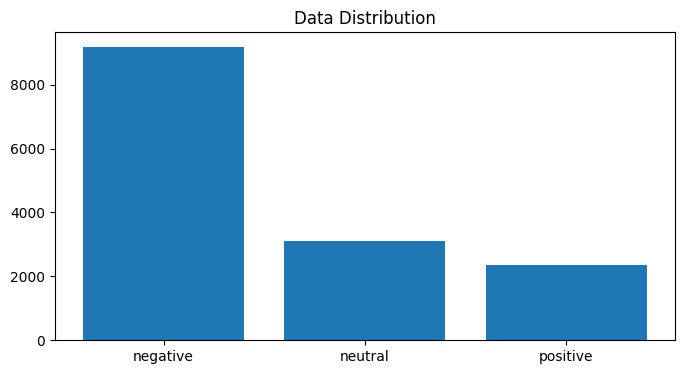

In [ ]:
instances = df.airline_sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(instances.index, instances.values)
plt.title("Data Distribution")

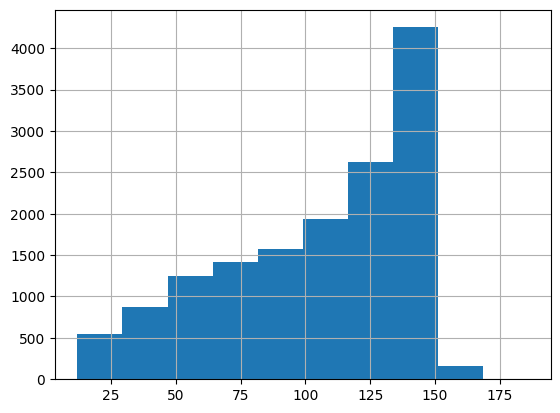

count    14640.000000
mean       103.822063
std         36.277339
min         12.000000
25%         77.000000
50%        114.000000
75%        136.000000
max        186.000000
dtype: float64

In [ ]:
tweets_len = [len(x) for x in df['text']]
pd.Series(tweets_len).hist()
plt.show()
pd.Series(tweets_len).describe()

In [ ]:
all_str = ""
for i in df.text:
    all_str += i

Number of Characters

In [ ]:
df1 = df.copy()

df1['number_of_characters'] = [len(tw) for tw in df1.text]
df1

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,processed_text,number_of_characters
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica dhepburn said,35
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plus added commercials experienc...,72
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica today must mean need take anothe...,71
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica really aggressive blast obnoxiou...,126
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica really big bad thing,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,americanair thank got different flight chicago,63
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,americanair leaving minutes late flight warnin...,150
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,americanair please bring american airlines,60
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),americanair money change flight answer phones ...,135


In [ ]:
df1.number_of_characters.max()

186

In [ ]:
df1.number_of_characters.min()

12

In [ ]:
df1.number_of_characters.mean()

103.82206284153006

In [ ]:
df1.number_of_characters.std()

36.277338964396776

Number of Words

In [ ]:
df1['number_of_words'] = [len(tw.split()) for tw in df1.text]
df1

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,processed_text,number_of_characters,number_of_words
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica dhepburn said,35,4
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plus added commercials experienc...,72,9
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica today must mean need take anothe...,71,12
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica really aggressive blast obnoxiou...,126,17
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica really big bad thing,55,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,americanair thank got different flight chicago,63,11
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,americanair leaving minutes late flight warnin...,150,23
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,americanair please bring american airlines,60,7
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),americanair money change flight answer phones ...,135,23


In [ ]:
df1.number_of_words.max()

36

In [ ]:
df1.number_of_words.min()

2

In [ ]:
df1.number_of_words.mean()

17.65341530054645

In [ ]:
df1.number_of_words.std()

6.882259181624969

Positives + Negatives

<BarContainer object of 20 artists>

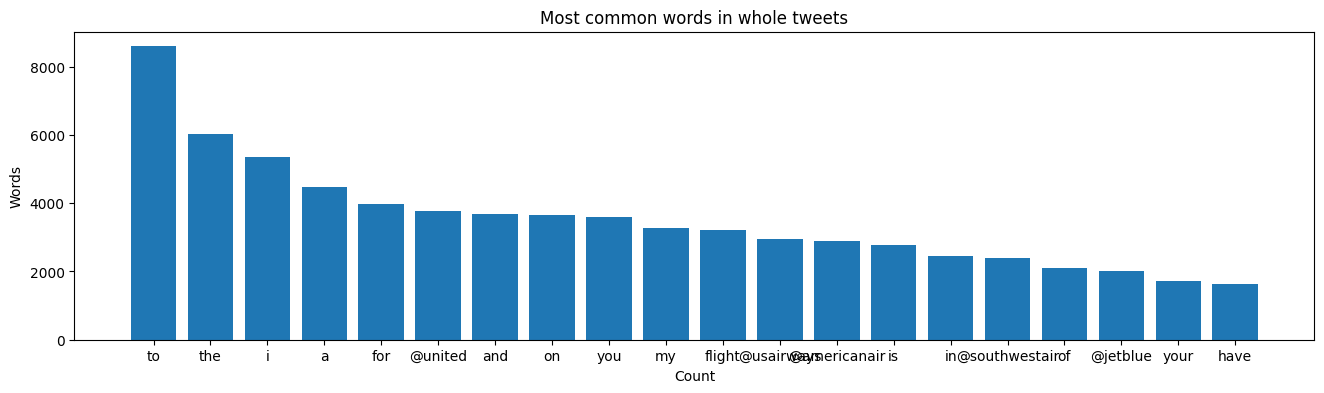

In [ ]:
import collections
from wordcloud import WordCloud
from nltk import word_tokenize, sent_tokenize
from nltk.util import ngrams

all_tweets = ' '.join(df['text'].str.lower())

f_words = [word for word in all_tweets.split()]
counted_words = collections.Counter(f_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)

plt.figure(figsize = (16, 4))
plt.title('Most common words in whole tweets')
plt.xlabel('Count')
plt.ylabel('Words')
plt.bar(words, counts)

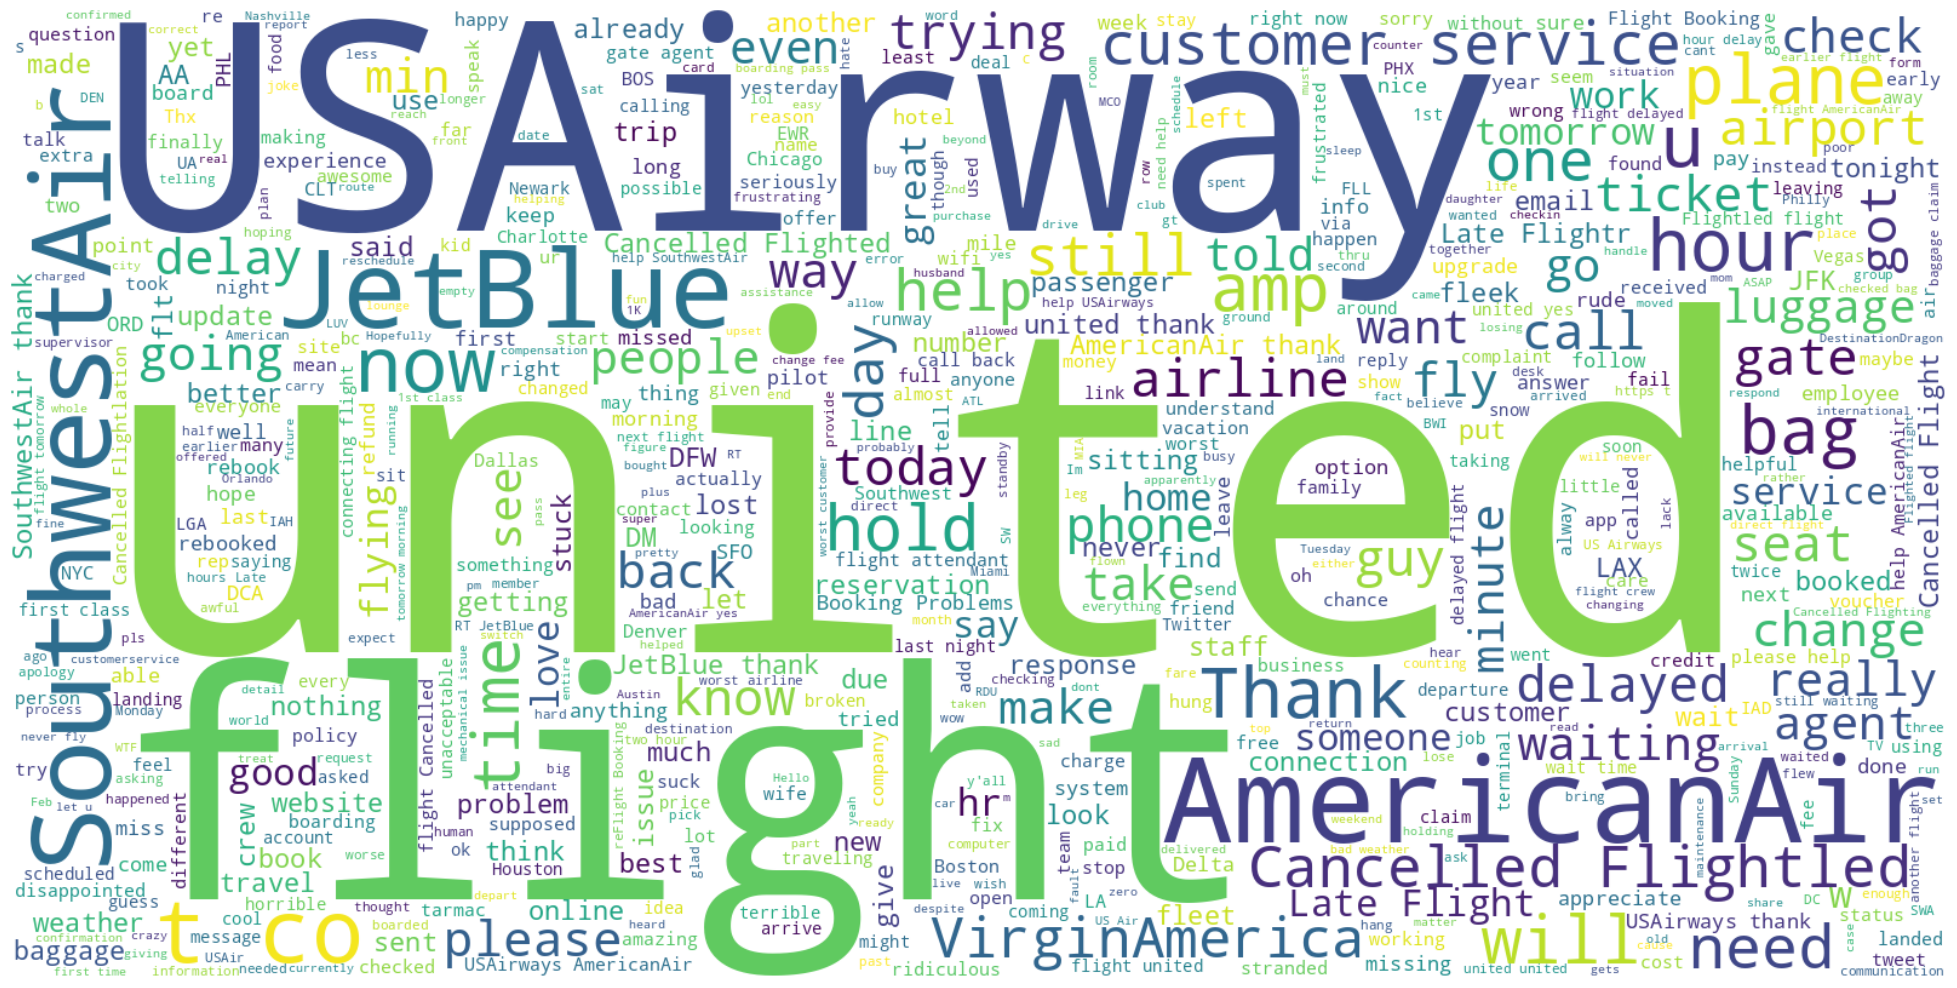

In [ ]:
plt.figure(figsize = (25, 25))
plt.axis('off')
wordcloud_fig = WordCloud(max_words = 2000 , width = 1600 , height = 800, background_color ='white', min_font_size = 10).generate(" ".join(df['text']))
plt.imshow(wordcloud_fig, interpolation = 'bilinear')

Training Data and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=7)
print('Training Data', len(train_data), 'Test Data', len(test_data))

train_data.head(10)

Training Data 11712 Test Data 2928


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,processed_text
742,570106249024446464,neutral,0.676,NaN,0.0000,United,NaN,fairplay500,NaN,0,@united I send you an urgent message via eserv...,"[0.0, 0.0]",2015-02-23 22:21:36 -0800,Huntsville AL USA,Central Time (US & Canada),united send urgent message via eservice naraya...
13419,569867786572341252,negative,1.000,Customer Service Issue,1.0000,American,NaN,waynebevan,NaN,0,"@AmericanAir Extend rtn flight to bereavement,...",NaN,2015-02-23 06:34:02 -0800,NaN,Alaska,americanair extend rtn flight bereavement coul...
14348,569630266664325120,neutral,0.662,NaN,0.0000,American,NaN,williebikes,NaN,0,@AmericanAir should be seeing this sunset from...,NaN,2015-02-22 14:50:13 -0800,NaN,NaN,americanair seeing sunset john usvi philly http
14572,569597666025345024,negative,1.000,Customer Service Issue,0.3482,American,NaN,bshelton68,NaN,0,"@AmericanAir When I left Orlando, I was 2nd in...",NaN,2015-02-22 12:40:40 -0800,Everett,Arizona,americanair left orlando line standby land mem...
8890,567770698111852544,negative,1.000,Late Flight,1.0000,Delta,NaN,LyndsaySignor,NaN,0,@JetBlue Is there something going on with your...,NaN,2015-02-17 11:40:57 -0800,New York City,Quito,jetblue something going alerts flight delayed ...
6961,569985299448795137,neutral,1.000,NaN,NaN,Delta,NaN,ModernDayGatsby,NaN,0,@JetBlue what's good with a Miami terminal?,NaN,2015-02-23 14:20:59 -0800,Long Island,NaN,jetblue good miami terminal
3329,568524550251479040,negative,1.000,Customer Service Issue,0.7000,United,NaN,rick4tkins,NaN,0,"@united that's what I tried to do, but when en...",NaN,2015-02-19 13:36:30 -0800,NaN,NaN,united tried entering email device made email ...
9876,569628521666117632,negative,1.000,longlines,0.6560,US Airways,NaN,EggZackLeeMe,NaN,0,@USAirways ... What's going on at @PHLAirport ...,"[39.8749922, -75.24017448]",2015-02-22 14:43:17 -0800,"West Chester, PA",Eastern Time (US & Canada),usairways going phlairport sitting gate
2613,568995256525398016,negative,1.000,Flight Attendant Complaints,0.6776,United,NaN,MyFitness52,NaN,0,"@united to Late Flight now, but in future flig...",NaN,2015-02-20 20:46:55 -0800,Washington,Arizona,united late flight future flights train staff ...
2945,568819406207356928,negative,1.000,Late Flight,0.3486,United,NaN,RickWasfy,NaN,0,@united will flight 5559 to YYC be providing f...,NaN,2015-02-20 09:08:09 -0800,Calgary,NaN,united flight yyc providing free food allowed ...


In [ ]:
test_data.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,processed_text
1298,569846237865885697,negative,1.0000,Can't Tell,0.6606,United,NaN,mbelliss,NaN,0,@united you've been officially displaced by @D...,NaN,2015-02-23 05:08:24 -0800,Louisville,Alaska,united officially displaced deltaassist better...
2886,568847735530643457,neutral,1.0000,NaN,NaN,United,NaN,rkjohnson2,NaN,0,@united Are the current on board food menus av...,NaN,2015-02-20 11:00:43 -0800,NaN,NaN,united current board food menus available anyw...
13754,569724545738760192,negative,1.0000,Cancelled Flight,0.6341,American,NaN,realtmh,NaN,0,@AmericanAir yes. Shows Cancelled Flightled &a...,NaN,2015-02-22 21:04:51 -0800,Dallas,NaN,americanair yes shows cancelled flightled amp ...
6784,570279787287093248,negative,0.6747,Can't Tell,0.6747,Delta,NaN,ch00bee,NaN,0,@JetBlue it's poop and barely works,NaN,2015-02-24 09:51:11 -0800,NaN,Atlantic Time (Canada),jetblue poop barely works
7793,569239947061927938,positive,1.0000,NaN,NaN,Delta,NaN,CamiCorreaBal,NaN,0,"@JetBlue thanks so much for help Us, u r amazing!",NaN,2015-02-21 12:59:14 -0800,NaN,Bogota,jetblue thanks much help us u r amazing
4254,567748565095968769,negative,1.0000,Late Flight,1.0000,United,NaN,MsDMichelle,NaN,0,@united Second day &amp; attempt trying to lea...,NaN,2015-02-17 10:13:00 -0800,"Washington, DC",Eastern Time (US & Canada),united second day amp attempt trying leave iad...
410,568150150289461249,neutral,0.6769,NaN,0.0000,Virgin America,NaN,wmrrock,NaN,0,@VirginAmerica You should still develop an app...,"[0.0, 0.0]",2015-02-18 12:48:46 -0800,CT,Eastern Time (US & Canada),virginamerica still develop app favorite airline
3464,568421732157161472,negative,1.0000,Late Flight,0.6726,United,NaN,jfmusial,NaN,0,@united please explain why I need to pay bag f...,NaN,2015-02-19 06:47:56 -0800,New York,Eastern Time (US & Canada),united please explain need pay bag fees twice ...
9128,570196428364111873,negative,1.0000,Can't Tell,0.6780,US Airways,NaN,ucbearcatdad,NaN,0,"@USAirways , since jan 22 have been on 10 flig...",NaN,2015-02-24 04:19:56 -0800,NaN,NaN,usairways since jan flights disrespect clt flt...
9607,569833680316829696,negative,1.0000,Can't Tell,0.6702,US Airways,NaN,pantsasnapkins,NaN,0,@USAirways You guys are screwing up my trip. T...,NaN,2015-02-23 04:18:31 -0800,The Specific Ocean\n,NaN,usairways guys screwing trip thanks nothing lazy


In [ ]:
train_data.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,processed_text
742,570106249024446464,neutral,0.676,NaN,0.0000,United,NaN,fairplay500,NaN,0,@united I send you an urgent message via eserv...,"[0.0, 0.0]",2015-02-23 22:21:36 -0800,Huntsville AL USA,Central Time (US & Canada),united send urgent message via eservice naraya...
13419,569867786572341252,negative,1.000,Customer Service Issue,1.0000,American,NaN,waynebevan,NaN,0,"@AmericanAir Extend rtn flight to bereavement,...",NaN,2015-02-23 06:34:02 -0800,NaN,Alaska,americanair extend rtn flight bereavement coul...
14348,569630266664325120,neutral,0.662,NaN,0.0000,American,NaN,williebikes,NaN,0,@AmericanAir should be seeing this sunset from...,NaN,2015-02-22 14:50:13 -0800,NaN,NaN,americanair seeing sunset john usvi philly http
14572,569597666025345024,negative,1.000,Customer Service Issue,0.3482,American,NaN,bshelton68,NaN,0,"@AmericanAir When I left Orlando, I was 2nd in...",NaN,2015-02-22 12:40:40 -0800,Everett,Arizona,americanair left orlando line standby land mem...
8890,567770698111852544,negative,1.000,Late Flight,1.0000,Delta,NaN,LyndsaySignor,NaN,0,@JetBlue Is there something going on with your...,NaN,2015-02-17 11:40:57 -0800,New York City,Quito,jetblue something going alerts flight delayed ...
6961,569985299448795137,neutral,1.000,NaN,NaN,Delta,NaN,ModernDayGatsby,NaN,0,@JetBlue what's good with a Miami terminal?,NaN,2015-02-23 14:20:59 -0800,Long Island,NaN,jetblue good miami terminal
3329,568524550251479040,negative,1.000,Customer Service Issue,0.7000,United,NaN,rick4tkins,NaN,0,"@united that's what I tried to do, but when en...",NaN,2015-02-19 13:36:30 -0800,NaN,NaN,united tried entering email device made email ...
9876,569628521666117632,negative,1.000,longlines,0.6560,US Airways,NaN,EggZackLeeMe,NaN,0,@USAirways ... What's going on at @PHLAirport ...,"[39.8749922, -75.24017448]",2015-02-22 14:43:17 -0800,"West Chester, PA",Eastern Time (US & Canada),usairways going phlairport sitting gate
2613,568995256525398016,negative,1.000,Flight Attendant Complaints,0.6776,United,NaN,MyFitness52,NaN,0,"@united to Late Flight now, but in future flig...",NaN,2015-02-20 20:46:55 -0800,Washington,Arizona,united late flight future flights train staff ...
2945,568819406207356928,negative,1.000,Late Flight,0.3486,United,NaN,RickWasfy,NaN,0,@united will flight 5559 to YYC be providing f...,NaN,2015-02-20 09:08:09 -0800,Calgary,NaN,united flight yyc providing free food allowed ...


In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 13837


 Split the Data

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['airline_sentiment'], test_size=0.2, random_state=42)


 Feature Extraction

In [ ]:
# Convert the text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


Train the Model

In [ ]:
# Train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)


MultinomialNB()

Evaluate the Model

In [ ]:
# Make predictions on the test set
predictions = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Display additional metrics
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


Accuracy: 0.78
              precision    recall  f1-score   support

    negative       0.79      0.94      0.86      1889
     neutral       0.66      0.40      0.50       580
    positive       0.81      0.59      0.68       459

    accuracy                           0.78      2928
   macro avg       0.75      0.64      0.68      2928
weighted avg       0.77      0.78      0.76      2928

[[1785   74   30]
 [ 316  230   34]
 [ 145   44  270]]
